# Matplotlib - O módulo para desenhar gráficos em Python

O matplotlib é um módulo para desenhar gráficos técnicos escrito em python, ciente do scipy e muito maduro.
Seguindo uma sintaxe parecida com a do matlab, o matplotlib e o numpy são os maiores responsáveis pela espaço que python conquistou nos meios acadêmicos.
Porém, tendo à disposição o poder da linguagem python, matplotlib usa os conceitos de orientação à objecto para possibilitar a elaboração de gráficos mais complexos.

Vamos começar com um exemplo:

In [2]:
import numpy as np
from matplotlib import pyplot as plt
#plt.style.use('seaborn-notebook')

# dados para serem plotados
x = np.linspace(-2*np.pi,2*np.pi,100)
y = np.sin(x)
z = np.cos(x)

# plotando x e sin(x)
plt.plot(x, y, label='seno')
# plotando x e cos(x)
plt.plot(x, z, label='cosseno')
# pedindo para plotar a legenda no "melhor" lugar
plt.legend(loc='best')
# pedindo que o gráfico seja desnhado, caso não esteja usando o notebook
plt.show()

A célula acima mostra o começo típico de um gráfico usando o matplotlib:
1. Organizamos os dados que serão plotados
2. Adicionamos cada curva
3. Pedimos elementos adicionais, como legendas, título, modificações nos eixos...
4. Pedimos que o gráfico seja mostrado ou salvamos ele no disco
Essa receita é o estilo matlab de fazer gráficos, e muita coisa pode ser feita com matplotlib sabendo isso e poucas outras funções para modificar os elementos do gráficos ou criar tipos de representação diferentes, como gráficos de barras ou gráficos em 2 e 3 dimensões.

Uma das melhores formas de se aprender a usar o matplotlib é através de exemplos, o próprio site do módulo disponibiliza [diversos exemplos com código e imagem](http://matplotlib.org/gallery.html).
Existe até uma [competição de gráficos em matplotlib](https://scipy2016.scipy.org/ehome/146062/332971/).

Para entender melhor como usar o matplotlib, vamos focar no método pythonico, isto é, seguindo os princípios de orientação à objeto.
Isso significa que uma figura é um objeto, os eixos de coordenadas dentro da figura são objetos, as curvas desenhadas são um objeto e por aí vai.
Comecemos criando uma figura:

In [3]:
# evita que eu tenha que digitar plt.show() e faz com que as figuras sejam
# mostradas no proprio notebook (caso contrário, é possível que uma janela 
# extra seja aberta para mostrar a figura)
# %matplotlib inline

In [4]:
fig = plt.figure()
plt.show()

Note que a figura não tem nada dentro e, portanto, não tem o que mostrar. 
Vamos adicionar um sistema conjunto de eixos bidimensionais à figura, que é feito 
adicionando um subplot dentro da figura:

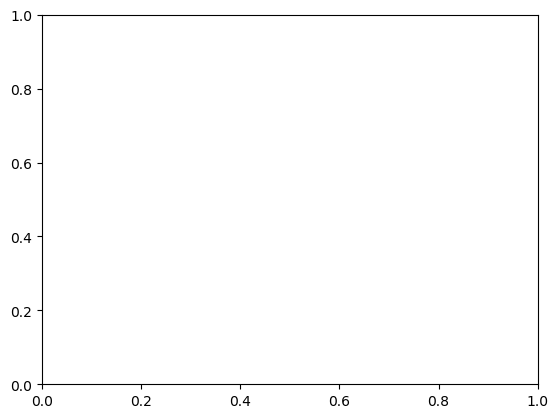

In [5]:
ax = fig.add_subplot(111)
fig

Note que, ao adicionarmo um subplot à figura, ganhamos uma referência ao subplot, à qual chamamos `ax`.
Com isso temos controle direto aos dois elementos principais da figura: a própria figura e o plot dentro dela.

Suponha que tenhamos um conjunto de dados bem simples para plotar.
Como o plot deve ser feito nos eixos, devemos usar a referência do subplot (que são os eixos) para isso:

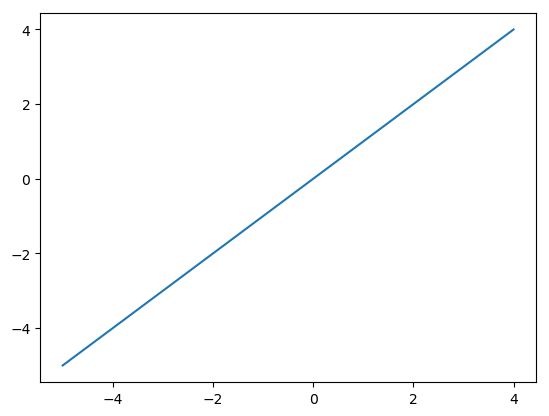

In [6]:
x = np.arange(-5,5)
(curve1,) = ax.plot(x, x)
fig

Novamente, ao pedir um novo elemento no gráfico, ganhamos uma referência ao elemento, neste caso a curva dos dados.
Note que os limites dos eixos foram ajustados automaticamente para conter toda a curva.

Digamos, agora, que não queremos o gráfico em forma de linha mas como pontos.
Podemos fazer isso da seguinte forma

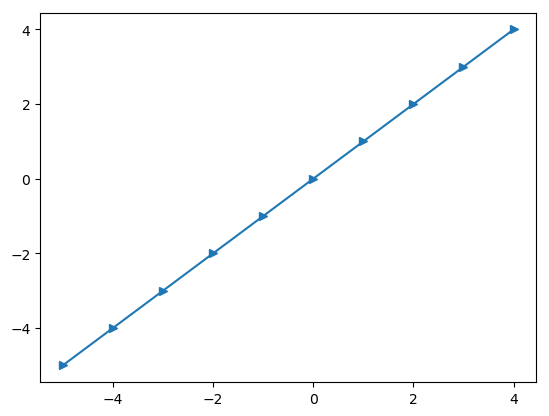

In [7]:
curve1.set_linestyle('-')
curve1.set_marker('>')
fig

Perceba que agora, como não inserimos nenhum novo elemento no gráfico mas apenas mudamos propriedades de um elemento já existente, nenhuma nova referência é criada.

Esses são os princípios de como trabalhar com a ideia de orientação a obejto no matplotlib.
Vejamos como melhorar nosso primeiro gráfico.

In [8]:
# esse comando simplifica a criação de plots, agregando alguns comandos vistos acima
fig, ax = plt.subplots() 

x = np.linspace(-2*np.pi, 2*np.pi,100)
y, z = np.sin(x), np.cos(x)
(c1,) = ax.plot(x, y, label='seno')
(c2,) = ax.plot(x, z, label='cosseno')
leg = ax.legend(loc=(1.02,0))

Suponha que queiramos controlar o número de marcações nos eixos.
Para isso podemos usar os métodos adequado da referência aos eixos:

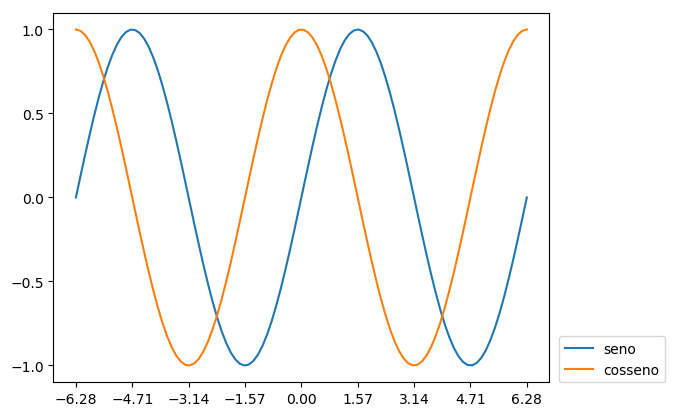

In [9]:
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_xticks([-2*np.pi,-3*np.pi/2,-np.pi,-np.pi/2,0,np.pi/2,np.pi,3*np.pi/2,2*np.pi])
fig

Uma característica muito útil do matplotlib é a capacidade de mostrar corretamente expressões matemáticas escritas em LaTex.
Vamos mudar a face dos marcadores do eixo x para múltiplos de π em LaTex:

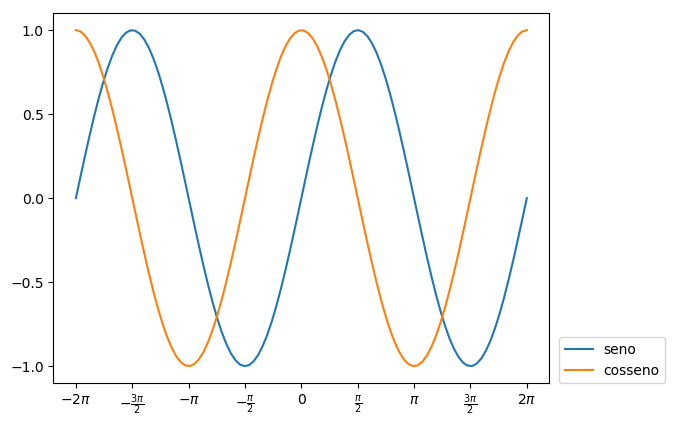

In [10]:
ax.set_xticklabels([r'$-2\pi$',r'$-\frac{3\pi}{2}$',r'$-\pi$',r'$-\frac{\pi}{2}$',0,r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'])
fig

Suponha agora, que não gostemos das bordas superior e direita do gráfico.
Podemos removê-las acessando os "spines" do eixo

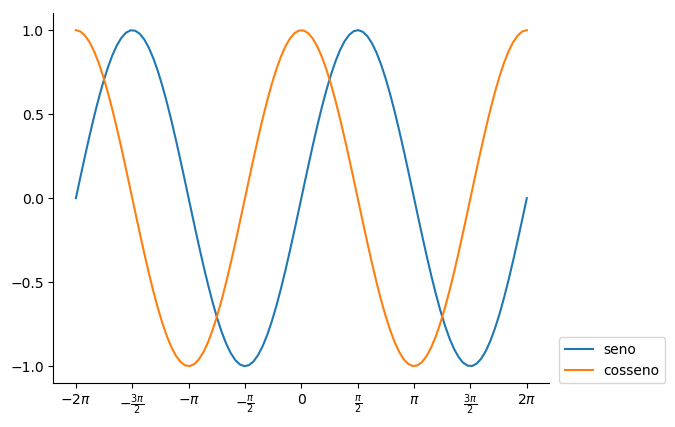

In [11]:
for s in ('right', 'top'):
    ax.spines[s].set_visible(False)
fig

Se quisermos mover legenda, podemos fazer:

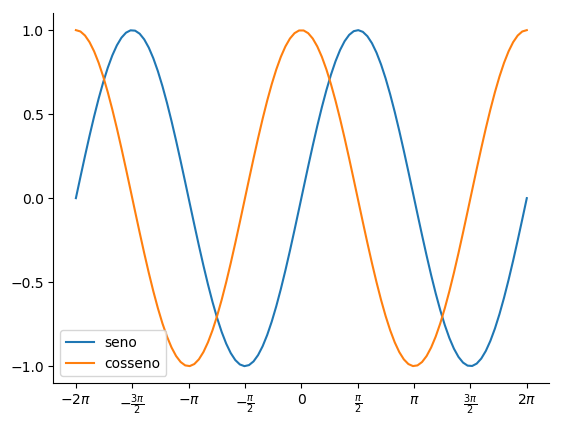

In [12]:
ax.legend(loc='best')
fig

E fim. Vamos salvar a figura

In [13]:
fig.savefig('seno-cosseno.svg')

# Outros tipos de gráficos

Embora o exemplo acima seja um gráfico de uma função simples, a maior parte dos conceitos se aplica para outros tipos de gráfico disponíveis no matplotlib.
Vejamos outras vizualizações comuns que podemos querer.

## Histogramas

Histogramas são úteis para ajustar modelos probabilisticos à amostras de algum experimento.
O matplotlib tem função para desenhar histogramas à partir de lista ou array do numpy, chamada `hist`:

In [14]:
# Gerando uma amostra de 10000 elementos gerados por uma Gaussiana cetrada em zero
# e com variância unitária
y = np.random.randn(10000)

# Vamos calcular o valor da densidade de probabilidade Gaussiana para este intervalo de x
x = np.linspace(-4,4,100)
# usando as funções do numpy para calcular em toda a array de uma só vez
gx = np.exp(-x*x/2)/np.sqrt(2*np.pi)

# para desenhar o histograma, basta criar uma figura e usar a função plt.hist
fig, ax = plt.subplots()
# plot do histograma com as palavras chave:
# bins = 50  -> escolhe quantos bins serão usados no histograma. poderíamos usar uma array com
#               as bordas de cada bin
# density = True -> normaliza a contagem do histograma de modo que a "integral" seja 1
_ = ax.hist(y, bins=50, density=True, label="Amostra")

# plot da densidade de probabilidade
ax.plot(x,gx, label="Gaussiana")

# mostrando as informações do gráfico
ax.legend(loc='best')
ax.set_xlabel(r'$x$')
for s in [s for (pos,s) in ax.spines.items() if pos in {'right','top'}]:
    s.set_visible(False)
_ = ax.set_title("Plot da densidade contra o histograma da amostra")

## Heatmap

Heatmaps são gráficos em escala de cor, úteis para mostrar densidades ou funções escalares em duas variáveis.
O matplotlib tem algumas funções para fazer isso, sendo a mais genérica (e às vezes mais lenta) `plt.pcolor` para variáveis arranjadas de forma arbitrária, uma para váriaves arranjadas em uma rede quadrada regular `plt.pcolormesh`, e uma para imagens `plt.imshow`

In [15]:
# Gerando valores das variáveis independentes x e y
x, y = np.linspace(-5,5,100), np.linspace(-1,1,20)

# Calculando uma função para cada ponto do produto cartesiano de x e y
# via broadcasting das funções do numpy. A sintaxe y[:,None] transforma
# uma array "linha" numa array "coluna".
z = np.sin(x*y[:,None]) - np.cos(y[:,None]) + np.sin(x)

# agora a figura
fig, ax = plt.subplots()
# note que o pcolormesh aceita arrays unidimensionais para os eixos e
# bidimensionais para a cor. 
# o valor `c` recebido é um objeto que pode ser usado para criar uma escala
# de cores
c = ax.pcolormesh(x,y,z)
# para colocar a escala de cores, é preciso pedir para a figura, usando o objeto 
# que resulta do pcolormesh
_ = fig.colorbar(c)

## Scatter plots

Algumas vezes queremos mostrar a posição no espaço de alguns pontos, sem que tenha uma função clara entre as variáveis $x$ e $y$. Isso pode ser útil para visualizar o deslocamento de partículas no plano quando combinado com a possibilidade de animação de gráficos que o matplotilib também disponibiliza.

O matplotlib tem a função `plt.scatter` para isso

In [16]:
# um conjunto aleatório de posições
x,y = np.random.randn(2,20)

fig, ax = plt.subplots()

# a palavra chave `c = 'k'` pede para a cor dos pontos ser preta (blac'k')
ax.scatter(x,y,c='k')
ax.set_xlabel(r'$x(t=t_0)$')
ax.set_ylabel(r'$y(t=t_0)$')
ax.set_title("Posições iniciais das partículas")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Mais de um gráfico por figura

É possível fazer desenha mais de um gráfico por figura usando a função `plt.subplots`, basta especificar o número de linhas e colunas que que você quer que a figura tenha:

In [17]:
fig, axs = plt.subplots(ncols=2,nrows=3)

Desta forma, a variável `axs` pode ser vista como uma array do numpy, mas com elementos do tipo axes do matplotlib:

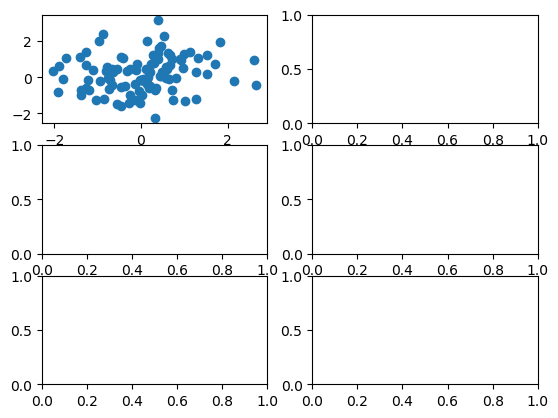

In [18]:
axs[0,0].scatter(*np.random.randn(2,100))
fig

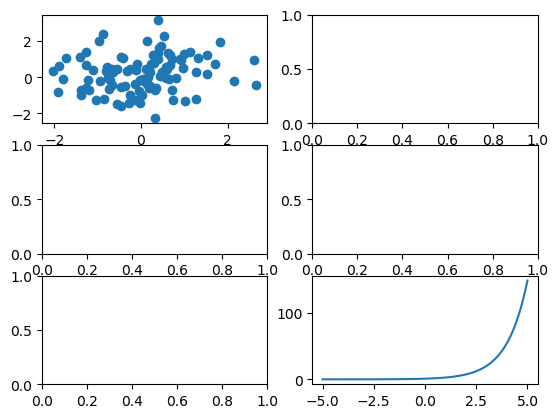

In [19]:
axs[2,1].plot(np.linspace(-5,5,100),np.exp(np.linspace(-5,5,100)))
fig

Há outras maneiras de criar visualizações com mais de um gráfico em disposições não regulares através do [axes_grid1 toolkit](https://matplotlib.org/tutorials/toolkits/axes_grid.html), e o axesartist

## Visualizações 3D

É possível criar visualizações tridimensionais usando o matplotlib.
Para isto é preciso importar uma classe especial no módulo `mpl_toolkits.mplot3d` chamada `Axes3D`. 
Com isso, é possível especificar que o gráfico sendo desenhado é tridimensional usando a palavra chave `projection` ao criar um novo objeto do tipo axes

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x,y,z = np.random.randn(3,100)
u,v,w = np.random.randn(3,100) + 1

# as duas linhas abaixo poderiam ser substituidas por:
# fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # cria um axes específico para imagens 3D
ax.scatter(x,y,z, c='r')
ax.scatter(u,v,w, c='b')

## Animações

O matplotlib também fornece uma interface para criar animações, através dos módulos `FuncAnimate` e `ArtistAnimate` que precisam ser importados do submódulo do matplotlib `matplotlib.animation`.

O módulo `FuncAnimate` é usado para criar imagens à partir de alguma função do usuário, chamada reptidamente a cada frame, enquando o `ArtistAnimate` cria uma animação à partir de uma sequência de imagens geradas previamente.

A ideia para o `FuncAnimate` é simple, mas demanda um certo trabalho: 
  - Criamos uma figura. Cada axes na figura deve ser definido com a palavra chave `animated=True` para que a animação o modifique
  - criamos uma função que gera o estado inicial do gráfico e devolve um iterável de objetos desenhaveis (um `Artist` no jargão do matplotlib)
  - criamos uma função que muda o estado do gráfica que devolve um iterável de objetos desenháveis
  
Vejamos um exemplo

In [2]:
# a linha abaixo desabilita a exibição de figuras no notebook, abrindo janelas
# dedicadas para cada figura quando chamamos a função `plt.show()`
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation

fig, ax = plt.subplots()
# xdata e ydata terão os valores para que serão usado para gerar o gráfico a cada frame
xdata, ydata = [1], [0]
curva, = ax.plot(xdata, ydata, 'ro', animated=True)  # a variável curva é um objeto desenhável

def init():
    # desenha um gráfico vazio, só eixos x e y num certo limite e devolve 
    # um objeto desenhável, no caso a curva definida acima
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return curva,

def update(frame):
    # frame é um valor numérico, então podemos calcular o seno de frame e traçar uma curva
    # y = sen(x). pense em frame como tempo em uma unidade diferente.
    xdata[0] = (xdata[0] + 0.2*np.random.randn())  # xdada terá cada instante em unidades de frame
    ydata[0] = (ydata[0] + 0.2*np.random.randn())  # ydata terá o seno de cada instante
    curva.set_data(xdata, ydata) # atualisamos a curva para ter os novos valores
    # curva.set_3d_properties(z)
    return curva,  

# cria um objeto de animação
ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)

# necessário para abrir uma nova janela com a animação
plt.show()

Using matplotlib backend: Qt5Agg


Para o `ArtistAnimate` basta criar uma lista de objetos desenháveis e criar a animação

In [ ]:
fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims é uma lista de listas, cada linha é um iterável de objetos desenháveis
# para desenhar no frame atual; neste caso á apenas um objeto desenhável, 
# a imagem, em cada frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# Para a salvar a animação, use
#
# ani.save("nome-da-animacao.mp4")
#
# ou
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("nome-da-animacao.mp4", writer=writer)

plt.show()